<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_08/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08



<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [11]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_08/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


1.1

In [12]:
dfnum = df.drop(['clase_tipo','traccion_tipo','transmision_tipo','combustible_tipo','tamano_motor_tipo','tamano_motor_tipo','consumo_tipo','co2_tipo'],axis=1)
dfnum['year'] = dfnum['year'].fillna(dfnum['year'].mean())
dfnum['desplazamiento'] = dfnum['desplazamiento'].fillna(dfnum['desplazamiento'].mean())
dfnum['cilindros'] = dfnum['cilindros'].fillna(dfnum['cilindros'].mean())
dfnum['co2'] = dfnum['co2'].fillna(dfnum['co2'].mean())
dfnum['consumo_litros_milla'] = dfnum['consumo_litros_milla'].fillna(dfnum['consumo_litros_milla'].mean())
scaler = MinMaxScaler()
dfnum[['year','desplazamiento','cilindros','co2','consumo_litros_milla']] = scaler.fit_transform(dfnum[['year','desplazamiento','cilindros','co2','consumo_litros_milla']])
dfnum

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294
...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878
36787,0.941176,0.038462,0.071429,0.174919,0.090196
36788,0.941176,0.038462,0.071429,0.182174,0.096886
36789,0.970588,0.038462,0.071429,0.176532,0.090196


1.2

In [13]:
dfcat =  df.drop(['year','desplazamiento','cilindros','co2','consumo_litros_milla'],axis=1)
dfcatn = pd.get_dummies(dfcat)
dfcatn

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


1.2 Explicación: NO OLVIDAR

1.3

In [14]:
df_procesado =  pd.concat([dfnum, dfcatn], axis=1, sort=False)
df_procesado

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0.941176,0.038462,0.071429,0.174919,0.090196,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0.941176,0.038462,0.071429,0.182174,0.096886,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0.970588,0.038462,0.071429,0.176532,0.090196,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas
    
    

2.1

In [15]:
kmeans = KMeans(n_clusters=8,n_init=25, random_state=123)
kmeans.fit(df_procesado)

KMeans(n_init=25, random_state=123)

2.2

In [16]:
centroids = kmeans.cluster_centers_
clusters = kmeans.labels_

df_procesado["cluster"] = clusters
df_procesado["cluster"] = df_procesado["cluster"].astype('category')
df_procesado2 = df_procesado.drop('cluster',axis=1)
centroids_df = pd.DataFrame(centroids, df_procesado2.columns)
centroids_df["cluster"] = [1,2,3,4,5,6,7,8]

ValueError: ignored

### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.


## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases). 

El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
dataset = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris[target] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


PCA:

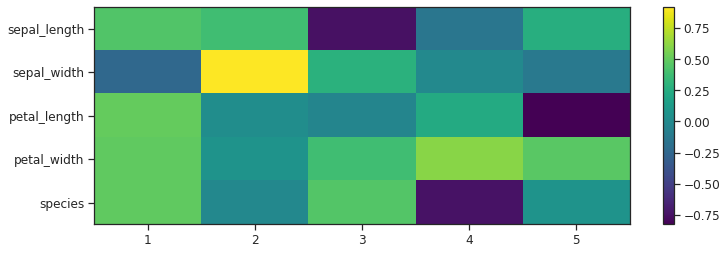

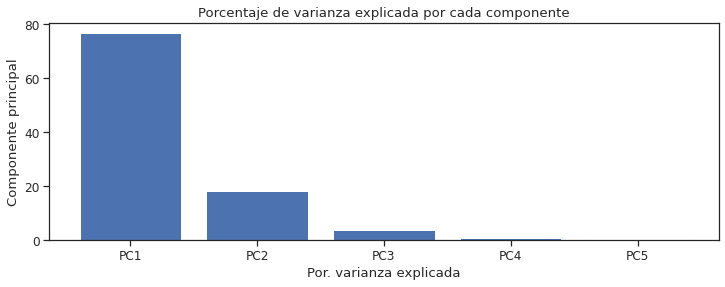

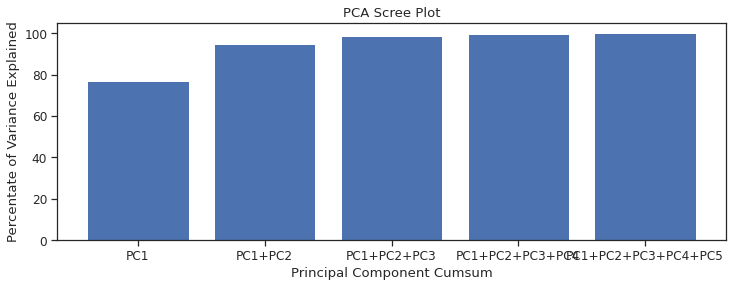

In [52]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(iris)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = iris.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5']
)
# Heatmap componentes
# ==============================================================================
plt.figure(figsize=(12,4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(iris.columns)), iris.columns)
plt.xticks(range(len(iris.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

# graficar varianza por componente
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,6), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 'PC1+PC2', 'PC1+PC2+PC3', 'PC1+PC2+PC3+PC4','PC1+PC2+PC3+PC4+PC5']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,6), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

TSNE:

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


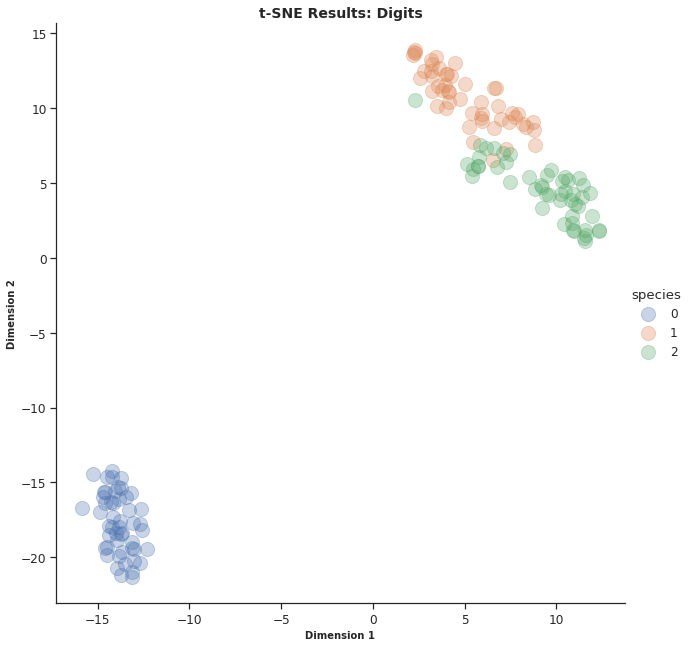

In [60]:
# tsne
scaler = StandardScaler()

X = iris.drop(columns='species')
y = iris['species']
    
embedding = TSNE(n_components=2)
X_transform = embedding.fit_transform(X)
    
df_tsne = pd.DataFrame(X_transform,columns = ['_DIM_1_','_DIM_2_'])
df_tsne['species'] = y

# Plot Digits t-SNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=df_tsne,
           fit_reg=False,
           legend=True,
           height=9,
           hue='species',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('t-SNE Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

Conclusiones: